In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../new_modules')
import ObsModels

import FSC as controller

In [3]:
import torch

# Experimental simulation

In [47]:
ObsSpace = np.array(["Obs 0", "Obs 1"])
ActSpace = np.array(["Act 0", "Act 1"])
MemSpace = np.array(["Mem 0", "Mem 1"])

M = len(MemSpace)
A = len(ActSpace)

In [48]:
NStepsObs = 100
NTraj = 100
Y = 2
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)
# convert observations to strings
observations = [ObsSpace[o] for o in observations]

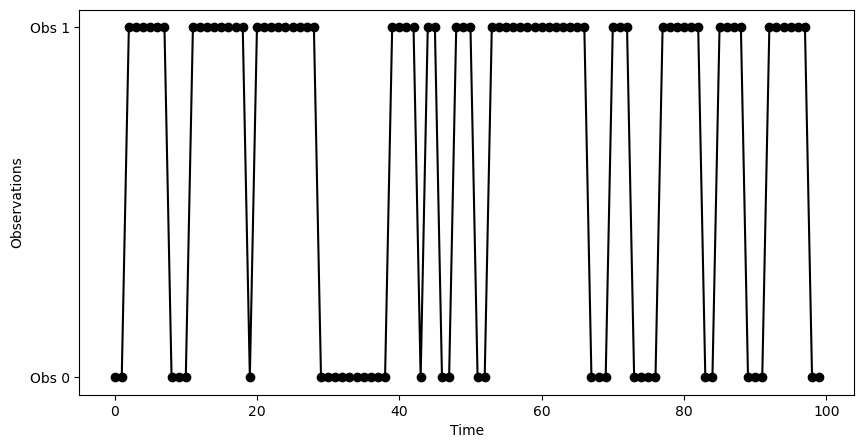

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(observations[0], 'o', label='Trajectory 0', color='black')
plt.plot(observations[0], color='black', label='Trajectory 0')
ax.set_xlabel('Time')
ax.set_ylabel('Observations')

plt.show()

In [50]:
ThetaFollowSwitch = np.array([[[[10, 0.01], [0.01, 0.01]],
                               [[0.01, 0.01], [0.01, 10]]],
                              [[[0.01, 0.01], [0.01, 10]],
                               [[10, 0.01], [0.01, 0.01]]]])


Psi = np.array([1, 2])


FSC_exp = controller.FSC("discrete", M = 2, A = 2, Y = Y, mode = "generation", seed = 42,
                         psi = Psi, theta = ThetaFollowSwitch,
                         ObsSpace = ObsSpace, ActSpace = ActSpace, MemSpace = MemSpace)

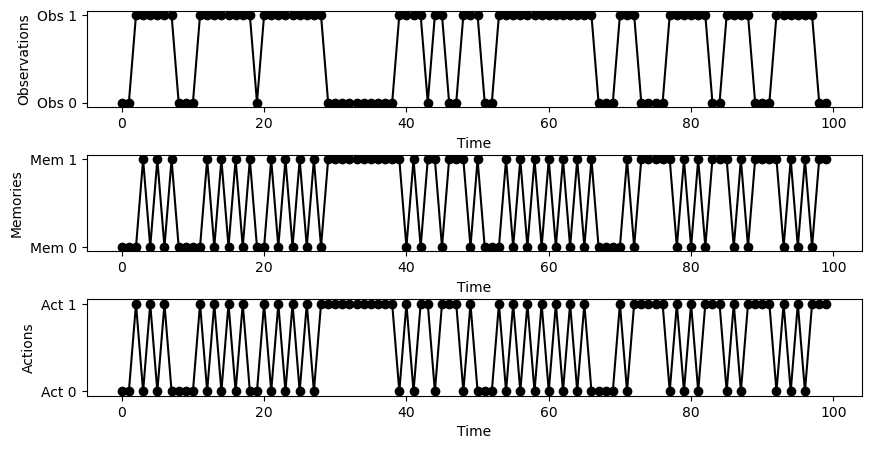

In [51]:
FSC_exp.load_observations(observations)

NSteps = NStepsObs
experimental_trajectories = FSC_exp.generate_trajectories(NSteps)

idx_trj = 0
trj = experimental_trajectories[idx_trj]
fig, ax = FSC_exp.generator.plot_trajectory(trj)

# Use-case example

In [52]:
FSC = controller.FSC("discrete", M = 2, A = 2, Y = 2, seed = 42,
                     ObsSpace = ObsSpace, ActSpace = ActSpace, MemSpace = MemSpace)

In [53]:
NEpochs = 20
NBatch = 20
lr = 0.2
gamma = 0.9

tloss, vloss = FSC.fit(experimental_trajectories,
                       NEpochs = NEpochs, NBatch = NBatch, lr = lr, gamma = gamma)

Training with 80 trajectories and validating with 20 trajectories.
Epoch 1 - Training loss: 65.6867156982422, Validation loss: 63.94129810333252 - Learning rate: 0.2
Epoch 2 - Training loss: 49.731980895996095, Validation loss: 44.50827598571777 - Learning rate: 0.18000000000000002
Epoch 3 - Training loss: 26.38423728942871, Validation loss: 21.114927959442138 - Learning rate: 0.16200000000000003
Epoch 4 - Training loss: 11.331734657287596, Validation loss: 8.90002875328064 - Learning rate: 0.14580000000000004
Epoch 5 - Training loss: 5.080356597900391, Validation loss: 4.399201261997223 - Learning rate: 0.13122000000000003
Epoch 6 - Training loss: 2.801964330673218, Validation loss: 2.7843659698963164 - Learning rate: 0.11809800000000004
Epoch 7 - Training loss: 1.9153435707092286, Validation loss: 2.125165808200836 - Learning rate: 0.10628820000000004
Epoch 8 - Training loss: 1.5155627489089964, Validation loss: 1.8155410289764404 - Learning rate: 0.09565938000000004
Epoch 9 - Traini

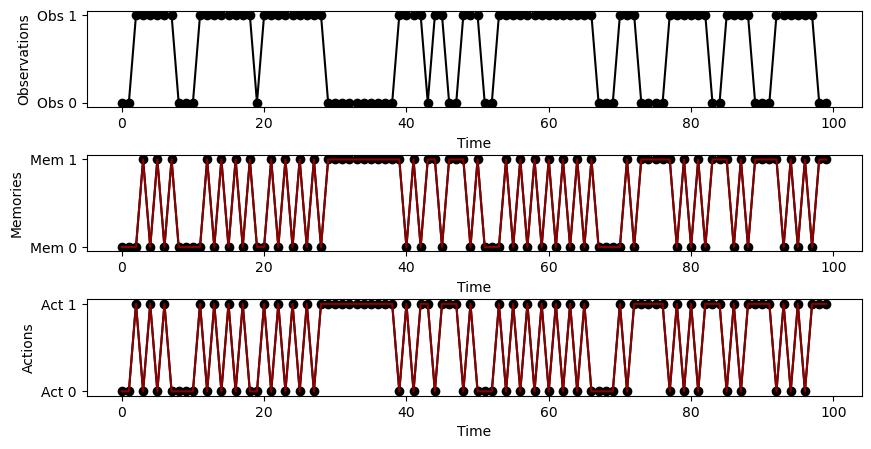

In [71]:
FSC.set_mode("generation")

generated_trajectories = FSC.generate_trajectories(NSteps)

idx_trj = 0
trj = generated_trajectories[idx_trj]
fig, ax = FSC.generator.plot_trajectory(trj)

ax[1].plot(experimental_trajectories[idx_trj]["memories"], label='Experimental', color='darkred')
ax[2].plot(experimental_trajectories[idx_trj]["actions"], label='Experimental', color='darkred')
plt.show()

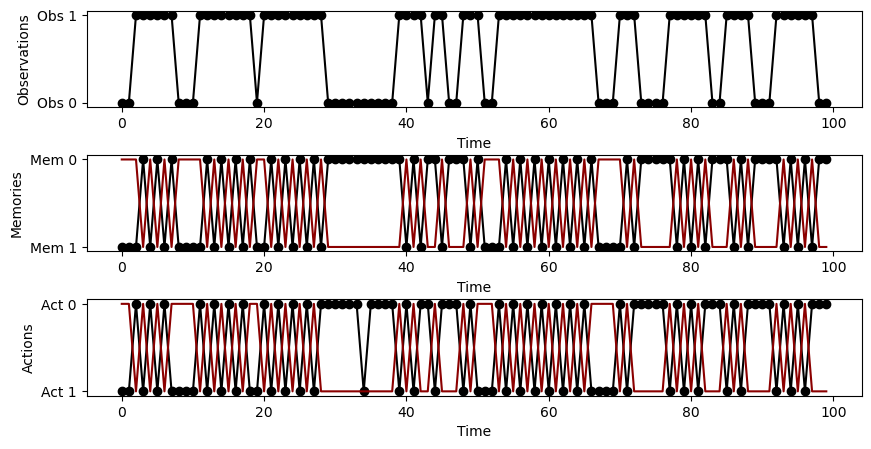

In [74]:
generated_trajectories = FSC.generate_trajectories(NSteps)

idx_trj = 0
trj = generated_trajectories[idx_trj]
fig, ax = FSC.generator.plot_trajectory(trj)

ax[1].plot(experimental_trajectories[idx_trj]["memories"], label='Experimental', color='darkred')
ax[2].plot(experimental_trajectories[idx_trj]["actions"], label='Experimental', color='darkred')
plt.show()